In [239]:
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.optimize import curve_fit
from scipy.stats import fit
from os import makedirs

In [240]:
makedirs("plots", exist_ok=True)

In [241]:
def load_db(path):
	with open(path, "r") as file:
		db = json.load(file)
	return db

def save_db(db, path):
	with open(path, "w") as file:
		json.dump(db, file, indent=4)

def get_count(data_dict, m):
	num = []
	for seed in data_dict[m]:
		num.append(data_dict[m][seed])
	return num

In [ ]:
def expected_loops(x):
    y = ((np.pi**2 - 9) / 12 ) * x**2
    return (y)

def linear(a, x):
    y = a * x
    return (y)

In [ ]:
loops = load_db("loops.json")
regions = load_db("regions.json")
steps = list(loops.keys())
steps = [int(x) for x in steps]

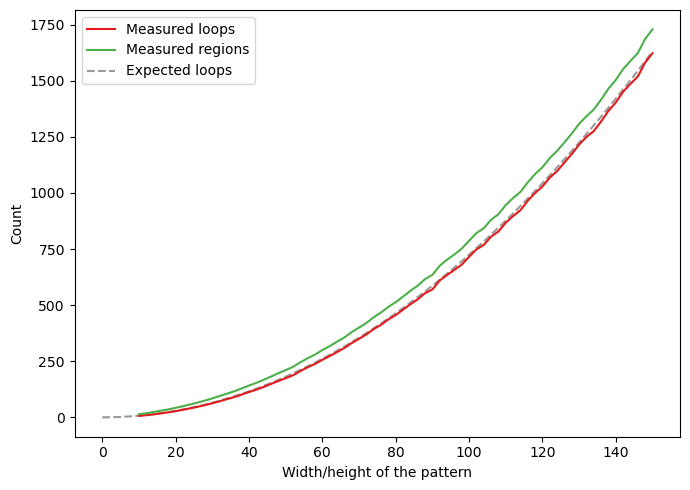

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

means = []
for m in loops:
    num_loops = get_count(loops, m)
    means.append(np.mean(num_loops))

ax.plot(steps, means, c="#e41a1c", label="Measured loops", zorder=1)

means = []
for m in regions:
    num_regions = get_count(regions, m)
    means.append(np.mean(num_regions))

ax.plot(steps, means, c="#4daf4a", label="Measured regions", zorder=1)

x_fit = np.linspace(0, 150, 1000)
regions_fit = []
for item in x_fit:
    regions_fit.append(expected_loops(item))

ax.plot(x_fit, regions_fit, c="#999999", label="Expected loops", linestyle="--", zorder=0)
plt.legend(loc="upper left")

plt.xlabel("Width/height of the pattern")
plt.ylabel("Count")

fig.tight_layout()
fig.savefig("plots/mean_loops_regions.png")

[0.10399862]
[0.00474524]


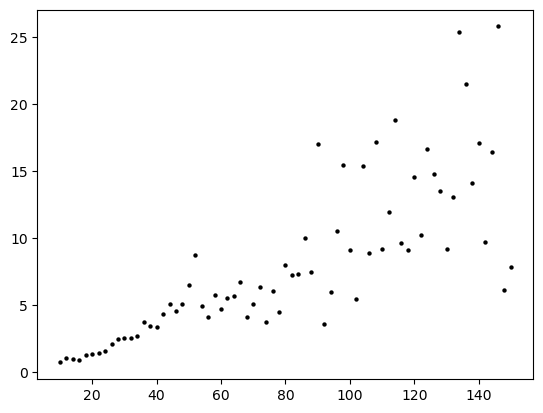

In [ ]:
differences = []
for m in loops:
    num_loops = get_count(loops, m)
    mean = np.mean(num_loops)
    expected = expected_loops(int(m))
    differences.append(expected - mean)

popt, pcov = curve_fit(linear,steps,differences, p0=1)
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

y_fit = []
for i in steps:
    y_fit.append(linear(i, *popt))

plt.scatter(steps, differences, c="black", lw=0, s=10)
#plt.plot(steps, y_fit, color="black")

[0.71505753]
[0.00067981]


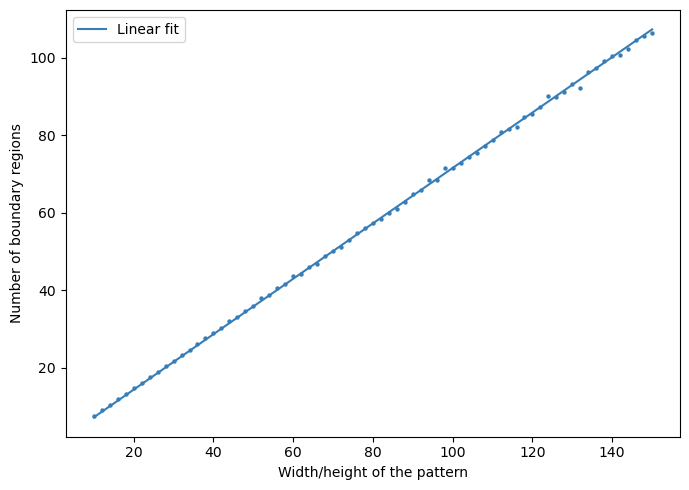

In [252]:
fig, ax = plt.subplots(figsize=(7, 5))

differences = []
for m in loops:
    deltas = []
    for seed in loops[m]:
        deltas.append(regions[m][seed] - loops[m][seed])
    differences.append(np.mean(deltas))

popt, pcov = curve_fit(linear,steps,differences, p0=1)
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

y_fit = []
for i in steps:
    y_fit.append(linear(i, *popt))

plt.scatter(steps, differences, c="#377eb8", lw=0, s=10, zorder=1)
plt.plot(steps, y_fit, c="#377eb8", label="Linear fit", linestyle="-", zorder=0)
plt.legend(loc="upper left")

plt.xlabel("Width/height of the pattern")
plt.ylabel("Number of boundary regions")

fig.tight_layout()
fig.savefig("plots/boundary_regions.png")

In [231]:
from scipy.stats.kde import gaussian_kde

def ridgeline(data, overlap=0, fill=True, labels=None, n_points=150, lw=1.5, bw_method="scott"):
    """
    Creates a standard ridgeline plot.

    data, list of lists.
    overlap, overlap between distributions. 1 max overlap, 0 no overlap.
    fill, matplotlib color to fill the distributions.
    n_points, number of points to evaluate each distribution function.
    labels, values to place on the y axis to describe the distributions.
    """
    if overlap > 1 or overlap < 0:
        raise ValueError('overlap must be in [0 1]')
    xx = np.linspace(np.min(np.concatenate(data)) -20,
                     np.max(np.concatenate(data)) + 20, n_points)

    ys = []
    for i, d in enumerate(data):
        pdf = gaussian_kde(d, bw_method=bw_method[i])
        y = i*(1.0-overlap)
        ys.append(y)
        curve = pdf(xx)
        plt.fill_between(xx, np.ones(n_points)*y, 
                            curve+y, zorder=len(data)-i+1, color=fill[i])
        plt.plot(xx, curve+y, c='k', zorder=len(data)-i+1, lw = lw)
    if labels:
        plt.yticks(ys, labels)

/tmp/ipykernel_744801/3952855419.py:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.kde import gaussian_kde


[[7, 7, 2, 6, 8, 6, 3, 2, 6, 8, 1, 8, 4, 12, 7, 5, 8, 4, 11, 7, 4, 8, 8, 7, 5, 6, 12, 7, 6, 9, 3, 7, 5, 11, 9, 12, 6, 12, 7, 3, 3, 6, 9, 5, 12, 5, 4, 8, 13, 5, 7, 7, 5, 9, 0, 1, 7, 5, 7, 3, 6, 6, 3, 7, 4, 4, 0, 10, 7, 6, 4, 18, 6, 3, 5, 11, 9, 13, 7, 8, 4, 9, 8, 8, 7, 7, 0, 6, 11, 5, 13, 6, 8, 8, 4, 11, 5, 3, 6, 8, 6, 4, 10, 9, 4, 5, 13, 7, 1, 8, 8, 11, 3, 1, 2, 4, 17, 7, 11, 8, 10, 12, 10, 8, 7, 9, 9, 3, 4, 4, 4, 6, 5, 6, 7, 2, 8, 9, 4, 6, 7, 4, 4, 2, 2, 8, 4, 8, 11, 5, 6, 5, 10, 2, 9, 4, 5, 5, 8, 4, 2, 9, 7, 5, 4, 6, 3, 4, 9, 7, 3, 4, 4, 12, 6, 8, 5, 5, 3, 6, 5, 1, 3, 4, 6, 7, 5, 7, 9, 4, 10, 7, 2, 5, 12, 9, 2, 6, 5, 8, 4, 9, 6, 5, 9, 3, 7, 16, 7, 6, 15, 8, 6, 10, 4, 7, 5, 8, 7, 5, 18, 7, 7, 6, 5, 11, 4, 3, 5, 9, 6, 7, 4, 7, 5, 10, 5, 5, 4, 7, 9, 6, 8, 7, 6, 8, 9, 5, 6, 7, 10, 2, 5, 8, 7, 5, 5, 4, 4, 6, 10, 9, 8, 12, 7, 7, 17, 4, 10, 8, 9, 6, 6, 1, 6, 3, 9, 7, 6, 10, 6, 3, 9, 4, 4, 7, 6, 8, 11, 1, 6, 4, 12, 2, 10, 4, 6, 3, 5, 6, 6, 6, 9, 11, 5, 4, 9, 12, 8, 12, 7, 2, 3, 2, 2, 8, 9, 3

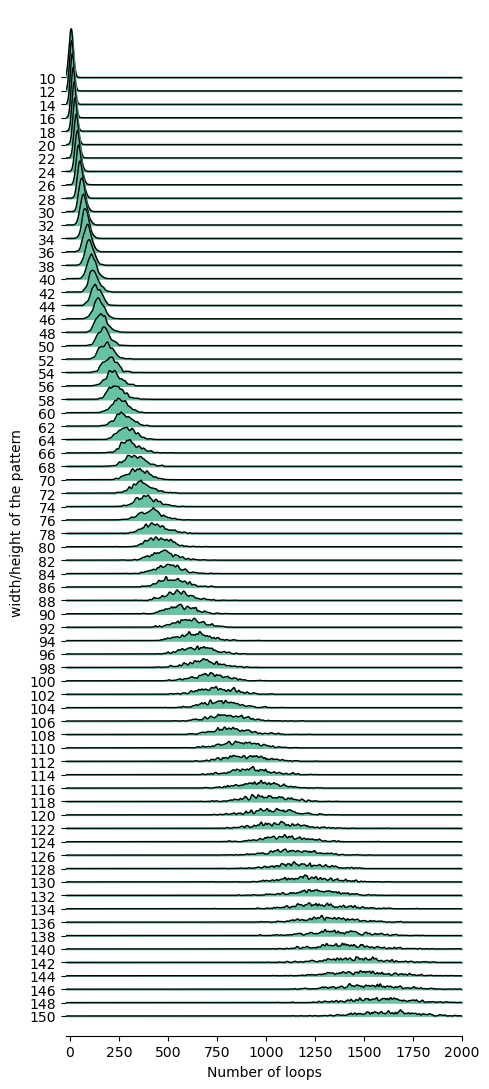

In [233]:
ridgeline_colors = np.full(len(steps), "#66c2a5")
num_loops = []
for m in loops:
    num_loops.append([loops[m][seed] for seed in loops[m]])

print(steps)
loops_reversed = list(reversed(num_loops))
steps_reversed = list(reversed(steps))
print(steps_reversed)

bw = np.zeros(len(steps_reversed))
bw += 15
for index,item in enumerate(loops_reversed):
    bw[index] *= 1 / (np.std(item)**1.3)

fig, ax = plt.subplots(figsize=(5, 11))
ridgeline(loops_reversed, labels=steps_reversed, overlap=0.99, fill=ridgeline_colors, n_points=5000, lw=1, bw_method=bw)
plt.xlim(-20,2000)
plt.xlabel("Number of loops")
plt.ylabel("width/height of the pattern")

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.margins(y=0.02)

fig.tight_layout()
fig.savefig("plots/loop_distribution.png")

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150]
[150, 148, 146, 144, 142, 140, 138, 136, 134, 132, 130, 128, 126, 124, 122, 120, 118, 116, 114, 112, 110, 108, 106, 104, 102, 100, 98, 96, 94, 92, 90, 88, 86, 84, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10]


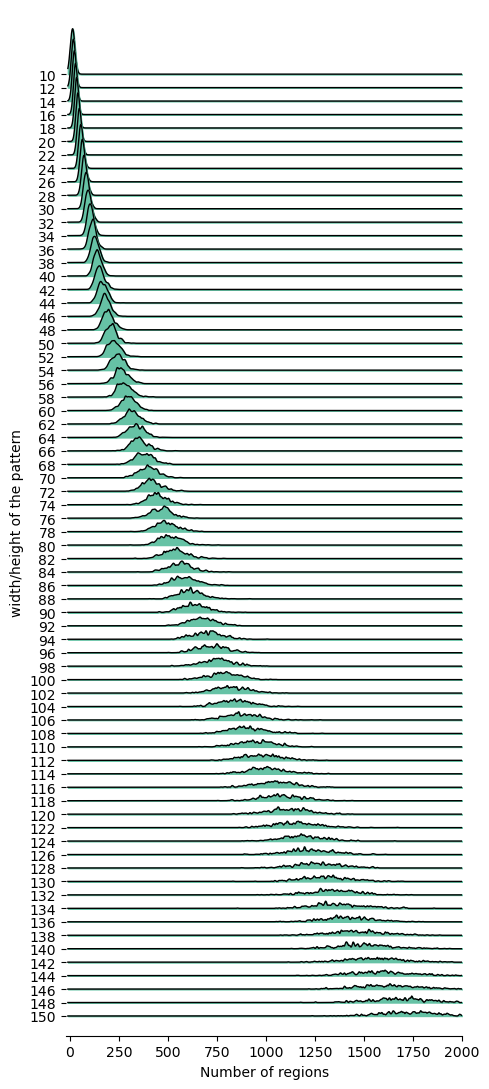

In [234]:
ridgeline_colors = np.full(len(steps), "#66c2a5")
num_regions = []
for m in regions:
    num_regions.append([regions[m][seed] for seed in regions[m]])

print(steps)
regions_reversed = list(reversed(num_regions))
steps_reversed = list(reversed(steps))
print(steps_reversed)

bw = np.zeros(len(steps_reversed))
bw += 15
for index,item in enumerate(regions_reversed):
    bw[index] *= 1 / (np.std(item)**1.3)

fig, ax = plt.subplots(figsize=(5, 11))
ridgeline(regions_reversed, labels=steps_reversed, overlap=0.99, fill=ridgeline_colors, n_points=5000, lw=1, bw_method=bw)
plt.xlim(-20,2000)
plt.xlabel("Number of regions")
plt.ylabel("width/height of the pattern")

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.margins(y=0.02)

fig.tight_layout()
fig.savefig("plots/region_distribution.png")